In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#reading the csv data 
df_org = pd.read_csv('Project_Dataset.csv')
df_org.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_num,addr_state_NE,addr_state_S,addr_state_W
0,0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,...,26,0.0,0.0,28699.0,30800.0,0,53,0,1,0
1,1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,...,9,0.0,0.0,9974.0,32900.0,0,22,0,1,0
2,2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,...,9,0.0,65.0,38295.0,34900.0,0,12,0,0,0
3,3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,...,135,0.0,0.0,55564.0,24700.0,0,41,0,1,0
4,4,16000,16000,16000.0,0,10.64,10,52000.0,1,20.16,...,96,0.0,0.0,47159.0,47033.0,0,24,0,0,1


In [3]:
df = df_org.copy()

In [4]:
df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_num,addr_state_NE,addr_state_S,addr_state_W
0,0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,...,26,0.0,0.0,28699.0,30800.0,0,53,0,1,0
1,1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,...,9,0.0,0.0,9974.0,32900.0,0,22,0,1,0
2,2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,...,9,0.0,65.0,38295.0,34900.0,0,12,0,0,0
3,3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,...,135,0.0,0.0,55564.0,24700.0,0,41,0,1,0
4,4,16000,16000,16000.0,0,10.64,10,52000.0,1,20.16,...,96,0.0,0.0,47159.0,47033.0,0,24,0,0,1


In [5]:
X = df.drop(['Unnamed: 0', 'loan_status'],axis =1)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,...,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W
0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,0.0,...,0.0,26,0.0,0.0,28699.0,30800.0,53,0,1,0
1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,0.0,...,0.0,9,0.0,0.0,9974.0,32900.0,22,0,1,0
2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,0.0,...,0.0,9,0.0,65.0,38295.0,34900.0,12,0,0,0
3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,0.0,...,0.0,135,0.0,0.0,55564.0,24700.0,41,0,1,0
4,16000,16000,16000.0,0,10.64,10,52000.0,1,20.16,0.0,...,0.0,96,0.0,0.0,47159.0,47033.0,24,0,0,1


In [6]:
y = df.loan_status

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 10, test_size = 0.2)

In [9]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,...,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W
279906,19200,19200,19200.0,0,9.17,10,130000.0,0,16.88,1.0,...,0.0,39,0.0,0.0,834246.0,21300.0,24,0,0,1
479937,12000,12000,12000.0,0,5.32,1,90000.0,0,13.28,0.0,...,0.0,4,0.0,0.0,47189.0,129300.0,15,0,0,0
319455,6500,6500,6500.0,0,8.19,10,77000.0,0,12.28,0.0,...,0.0,52,0.0,0.0,236076.0,12200.0,11,0,0,1
317931,26850,26850,26850.0,0,17.86,10,97800.0,1,13.60,0.0,...,0.0,35,0.0,0.0,176796.0,61900.0,41,0,1,0
426404,15000,15000,15000.0,0,6.62,4,67300.0,0,13.25,0.0,...,0.0,100,0.0,0.0,187890.0,25300.0,14,0,0,1


In [10]:
y_train = y_train.values.reshape(-1,1)

In [11]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (425929, 32)
y_train (425929, 1)
X_test (106483, 32)
y_test (106483,)


In [12]:
X_train = sm.add_constant(X_train)
logreg = sm.Logit(y_train , X_train).fit()
print(logreg.summary())

         Current function value: 0.456678
         Iterations: 35


C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               425929
Model:                          Logit   Df Residuals:                   425896
Method:                           MLE   Df Model:                           32
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.1648
Time:                        00:24:56   Log-Likelihood:            -1.9451e+05
converged:                      False   LL-Null:                   -2.3290e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7144      0.029    -60.138      0.000      -1.770      -1.659
loan_amnt                      0.0002   1.64e-05     15.073      0.000       0.000 

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_train, y_train)

0.7648434363473724

In [14]:
X_test = sm.add_constant(X_test)

In [68]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     81326
           1       0.58      0.02      0.04     25157

    accuracy                           0.77    106483
   macro avg       0.67      0.51      0.45    106483
weighted avg       0.72      0.77      0.67    106483



### Balancing the data through SMOTE techniques

In [17]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [22]:
print(X_train_res.shape)
print(y_train_res.shape)

(650544, 33)
(650544,)


In [23]:
print('Total counts of 1',sum(y_train_res == 1))
print('Total counts of 0',sum(y_train_res == 0))

Total counts of 1 325272
Total counts of 0 325272


In [72]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_res, y_train_res)

y_pred_s = logreg1.predict(X_test)

print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

           0       0.85      0.62      0.71     81326
           1       0.34      0.64      0.44     25157

    accuracy                           0.62    106483
   macro avg       0.59      0.63      0.58    106483
weighted avg       0.73      0.62      0.65    106483



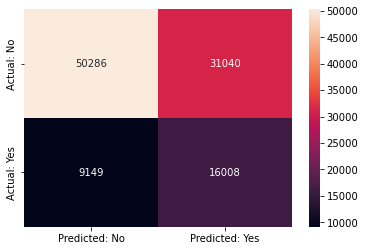

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_s)
cm
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

### Removing VIF Columns (VIF>10)

In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature          VIF
0                    loan_amnt  2855.921532
1                  funded_amnt  4168.188315
2              funded_amnt_inv  1072.653077
3                         term     2.188309
4                     int_rate    75.700366
5                   emp_length     3.258455
6                   annual_inc     3.153794
7          verification_status     3.759441
8                          dti     7.279203
9                  delinq_2yrs     1.215289
10              inq_last_6mths     1.712806
11      mths_since_last_delinq     1.608487
12                    open_acc    12.393602
13                     pub_rec     1.162695
14                   revol_bal     5.658443
15                  revol_util     8.958564
16                   total_acc    11.932072
17         initial_list_status     2.153222
18               total_rec_int     4.698179
19          total_rec_late_fee     1.028130
20                  recoveries     2.863418
21     collection_recovery_fee  

In [27]:
X_new = X.drop(['funded_amnt_inv','open_acc','int_rate','grade_num','last_week_pay','total_rec_int','total_rec_late_fee','total_acc'],axis =1)

In [28]:
X_new.head()

,loan_amnt,funded_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,addr_state_NE,addr_state_S,addr_state_W
0,14350,14350,0,9,28700.0,1,33.88,0.0,1.0,50.0,...,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0,0,1,0
1,4800,4800,0,0,65000.0,1,3.64,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0,1,0
2,10000,10000,0,2,45000.0,0,18.42,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0,0,0
3,15000,15000,0,10,105000.0,0,14.97,0.0,2.0,46.0,...,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0,1,0
4,16000,16000,0,10,52000.0,1,20.16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0,0,1


In [31]:
vif_new = pd.DataFrame()
vif_new["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_new["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_new)

                       feature          VIF
0                    loan_amnt  2820.815845
1                  funded_amnt  2819.747353
2                         term     1.781153
3                   emp_length     3.153719
4                   annual_inc     3.088680
5          verification_status     3.615353
6                          dti     5.470169
7                  delinq_2yrs     1.175870
8               inq_last_6mths     1.470629
9       mths_since_last_delinq     1.542408
10                     pub_rec     1.138399
11                   revol_bal     5.333808
12                  revol_util     6.861279
13         initial_list_status     1.968210
14                  recoveries     2.842030
15     collection_recovery_fee     2.803597
16  collections_12_mths_ex_med     1.023162
17              acc_now_delinq     1.026972
18                tot_coll_amt     1.021138
19                 tot_cur_bal     2.607835
20            total_rev_hi_lim     5.572808
21               addr_state_NE  

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y , random_state = 10, test_size = 0.2)

In [36]:
y_train2 = y_train2.values.reshape(-1,1)

In [37]:
print('X_train', X_train2.shape)
print('y_train', y_train2.shape)

# print dimension of test set
print('X_test', X_test2.shape)
print('y_test', y_test2.shape)

X_train (425929, 24)
y_train (425929, 1)
X_test (106483, 24)
y_test (106483,)


In [38]:
# Using SMOTE technique to create synthetics data point
sm = SMOTE(random_state = 2)
X_train_new, y_train_new = sm.fit_resample(X_train2, y_train2.ravel())

In [42]:
print(X_train_new.shape)
print(y_train_new.shape)

(650544, 24)
(650544,)


In [43]:
print('Total counts of 1',sum(y_train_new == 1))
print('Total counts of 0',sum(y_train_new == 0))

Total counts of 1 325272
Total counts of 0 325272


#### Again Cross checking the Logistic Regreession Algorithm

In [45]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_new, y_train_new)

y_pred2 = logreg2.predict(X_test2)

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66     81326
           1       0.28      0.57      0.38     25157

    accuracy                           0.56    106483
   macro avg       0.55      0.56      0.52    106483
weighted avg       0.68      0.56      0.59    106483



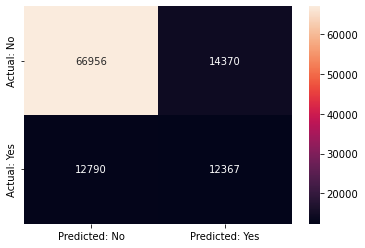

In [74]:
cm = confusion_matrix(y_test2,y_pred2)
cm
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

# AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 300) # Estimator need to change
ada.fit(X_train_new, y_train_new)

y_pred_ada = ada.predict(X_test2)
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred_ada))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     81326
           1       0.60      0.36      0.45     25157

    accuracy                           0.79    106483
   macro avg       0.71      0.64      0.66    106483
weighted avg       0.77      0.79      0.77    106483



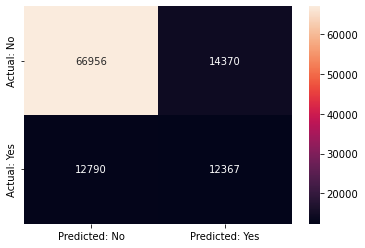

In [76]:
cm = confusion_matrix(y_test2,y_pred_ada)
cm
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train_new,y_train_new)
y_pred_rf = rf.predict(X_test2)
accuracy_score(y_test2,y_pred_rf)
print(classification_report(y_test2,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     81326
           1       0.65      0.34      0.45     25157

    accuracy                           0.80    106483
   macro avg       0.74      0.64      0.66    106483
weighted avg       0.78      0.80      0.78    106483



## GridSearchCV

In [52]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,10,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [53]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 10, None], 'max_samples': [0.5, 0.75, 1.0]}


In [54]:
rf = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train_new,y_train_new)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
# Best on Grid serach CV Parameter

In [67]:
rf = RandomForestClassifier(max_samples=0.75, min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 0.4, random_state=40)
rf.fit(X_train_new,y_train_new)
y_pred_rf = rf.predict(X_test2)
accuracy_score(y_test2,y_pred_rf)
print(classification_report(y_test2,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     81326
           1       0.64      0.35      0.45     25157

    accuracy                           0.80    106483
   macro avg       0.73      0.64      0.66    106483
weighted avg       0.78      0.80      0.78    106483



# Gradient Boosting

In [ ]:
params = {'n_estimators': [100, 120, 150, 200, 250, 300, 350],
   'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],'max_depth': [2, 3, 4, 5, 6]}
grid = GridSearchCV(GradientBoostingClassifier(),params)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)

best_gb = grid.best_estimator_
best_gb

In [79]:
gb = GradientBoostingClassifier(learning_rate=0.05)
gb.fit(X_train_new,y_train_new)
y_pred_gb = gb.predict(X_test2)
accuracy_score(y_test2,y_pred_gb)
print(classification_report(y_test2,y_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     81326
           1       0.50      0.47      0.48     25157

    accuracy                           0.76    106483
   macro avg       0.67      0.66      0.66    106483
weighted avg       0.76      0.76      0.76    106483



## Grid Search CV for XGBoost

In [ ]:
params = {'n_estimators': [100, 120, 150],
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma': [2, 3, 4, 5, 6],
    'max_depth': [2, 3, 4, 5, 6]}

grid = GridSearchCV(XGBClassifier(), params)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)

best_xgb = grid.best_estimator_
best_xgb

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb = XGBClassifier(learning_rate = 0.05, gamma = 4)
xgb.fit(X_train_new, y_train_new)
y_pred_xgb = xgb.predict(X_test2)

print(roc_auc_score(y_test2, y_pred_xgb))
print(classification_report(y_test2, y_pred_xgb))

0.6518889766628996
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     81326
           1       0.60      0.38      0.47     25157

    accuracy                           0.79    106483
   macro avg       0.71      0.65      0.67    106483
weighted avg       0.77      0.79      0.78    106483

